In [2]:
#loading the dataset 
#Importing pandas library 
import pandas as pd 
import numpy as np

#Reading the dataset 
mydata=pd.read_csv('Football teams.csv')
mydata.describe()

#Input and output features 
#Input features 


X = mydata.drop(['Rating' , 'Team' , 'Tournament'] , axis=1)

#Output features 

y = mydata.drop(['Goals' , 'Shots pg' , 'yellow_cards' , 'red_cards' , 'Possession%' , 'Pass%' , 'AerialsWon' , 'Team' , 'Tournament' ] , axis=1)

#Splitting the dataset into training and testing datset 
#Importing train_test_split function 

from sklearn.model_selection import train_test_split

#Splitting the dataset 

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.21 )


In [3]:
#Decision Tree Regression model 
#Import the regressor 

from sklearn.tree import DecisionTreeRegressor

#Creating and fitting the model 

LL_dt = DecisionTreeRegressor().fit(X_train , y_train)

#The coeff of determination 

print(LL_dt.score(X_train, y_train))

1.0


In [4]:
from sklearn.metrics import mean_absolute_error , mean_squared_error , explained_variance_score , r2_score
#Prediction on the training dataset 
ytrain_pred = LL_dt.predict(X_train)

#The r_sq 

print(r2_score(y_train , ytrain_pred))

1.0


In [5]:
#The MSE 

print( mean_squared_error(y_train , ytrain_pred))

0.0


In [6]:
#The RMSE 
print(np.sqrt(mean_squared_error(y_train , ytrain_pred)))

0.0


In [7]:
#The EVS 
print(explained_variance_score(y_train , ytrain_pred))

1.0


In [9]:
#Predicting the testing data 

ytest_pred = LL_dt.predict(X_test)
print(ytest_pred)


[6.69 6.59 6.54 6.56 6.59 6.48 6.88 6.81 6.71 6.69 6.47 6.85 6.59 6.85
 6.63 6.62 6.55 6.62 6.82 6.54 6.62]


In [10]:
#The r_sq 

print(r2_score(y_test , ytest_pred))

0.46460692871418996


Text(0.5, 0, ' Testing Sample data ')

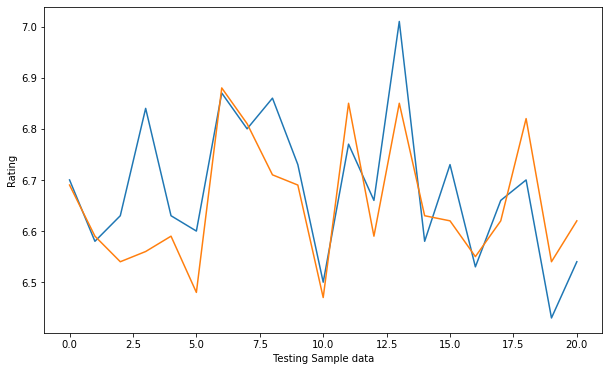

In [11]:
#Plotting the observed and predicted data
import matplotlib.pyplot as plt 
#Setting the boundaries and parameters
plt.rcParams['figure.figsize']=(10,6)
x_ax = range(len(X_test))
#Plotting 
plt.plot(x_ax , y_test.values.ravel())
plt.plot(x_ax , ytest_pred)
plt.ylabel("Rating")
plt.xlabel(" Testing Sample data ")

C:\Users\ashok\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


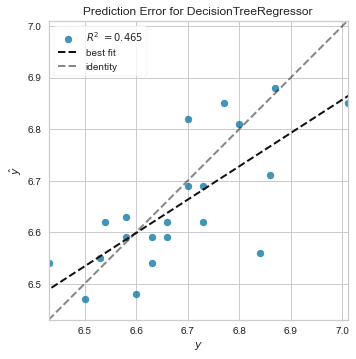

<AxesSubplot:title={'center':'Prediction Error for DecisionTreeRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [13]:
#Plotting the prediction errors and residuals using yellowbrick 
#Plotting the prediction errors 
import yellowbrick
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(LL_dt)
visualizer.fit(X_train , y_train)
visualizer.score(X_test,y_test.values.ravel())
visualizer.poof()

In [14]:
#The metrics 
#The MAE
print( mean_absolute_error(y_test , ytest_pred))

0.07761904761904762


In [15]:

#The MSE
print( mean_squared_error(y_test , ytest_pred))

0.010204761904761918


In [16]:
#The RMSE
print( np.sqrt(mean_squared_error(y_test , ytest_pred)))

0.10101862157425193


In [17]:
#The EVS
print(explained_variance_score(y_test , ytest_pred))

0.5148710383553816


In [19]:
#The k-fold CV 
from sklearn.model_selection import cross_val_score

#Training model CV 
score_train = cross_val_score(LL_dt,X_train , y_train , scoring='neg_mean_squared_error' , cv=10)

score_train

array([-0.0135    , -0.0073125 , -0.0045875 , -0.0029125 , -0.004     ,
       -0.00545   , -0.0036625 , -0.01102857, -0.00884286, -0.0089    ])

In [21]:
score_train = np.mean(score_train)
score_train

-0.007019642857142854

In [24]:
#THe absolute mean score 
from numpy import absolute
print(absolute(np.mean(score_train)))

0.007019642857142854


In [26]:
#Testing  model CV  or On the testing dataset
score_test = cross_val_score(LL_dt,X_test , y_test , scoring='neg_mean_squared_error' , cv=10)

score_test

array([-0.00166667, -0.00205   , -0.00225   , -0.00905   , -0.0109    ,
       -0.00725   , -0.01105   , -0.01625   , -0.01325   , -0.00905   ])

In [27]:
print(absolute(np.mean(score_test)))

0.008276666666666693
